# Задание
* Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)
* Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
* Создайте DataFrame в котором будут даты публикации вакансий, названия, описания,  только добавьте поле ключевые навыки
* Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите вакансии с использованием python, которые вам интересны
* Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
* Постройте график наиболее востребованных навыков

In [312]:
import requests
from tqdm.auto import tqdm
from time import sleep
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, time

## Задание 1
#### Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)


документация по запросу тут https://api.hh.ru/openapi/redoc#tag/Poisk-vakansij-dlya-soiskatelya/operation/get-vacancies-similar-to-resume

Россия = 113
Москва - 1 (родительский 113)

для сбора по все России используем регион по дефолту
для запроса всех данных ????

In [313]:
sber = '3529'
page = 1
num_per_page = 100
#moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'#'&area={moscow}'

In [314]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [315]:
res # успешный запрос

<Response [200]>

In [316]:
res.content # что получил запрос

b'{"items":[{"id":"78562289","premium":false,"name":"Frontend \xd1\x80\xd0\xb0\xd0\xb7\xd1\x80\xd0\xb0\xd0\xb1\xd0\xbe\xd1\x82\xd1\x87\xd0\xb8\xd0\xba","department":{"id":"3529-3529-it","name":"\xd0\xa1\xd0\xb1\xd0\xb5\xd1\x80. IT"},"has_test":false,"response_letter_required":false,"area":{"id":"1","name":"\xd0\x9c\xd0\xbe\xd1\x81\xd0\xba\xd0\xb2\xd0\xb0","url":"https://api.hh.ru/areas/1"},"salary":null,"type":{"id":"open","name":"\xd0\x9e\xd1\x82\xd0\xba\xd1\x80\xd1\x8b\xd1\x82\xd0\xb0\xd1\x8f"},"address":{"city":"\xd0\x9c\xd0\xbe\xd1\x81\xd0\xba\xd0\xb2\xd0\xb0","street":"\xd0\x9a\xd1\x83\xd1\x82\xd1\x83\xd0\xb7\xd0\xbe\xd0\xb2\xd1\x81\xd0\xba\xd0\xb8\xd0\xb9 \xd0\xbf\xd1\x80\xd0\xbe\xd1\x81\xd0\xbf\xd0\xb5\xd0\xba\xd1\x82","building":"32\xd0\xba1","lat":55.741404,"lng":37.531559,"description":null,"raw":"\xd0\x9c\xd0\xbe\xd1\x81\xd0\xba\xd0\xb2\xd0\xb0, \xd0\x9a\xd1\x83\xd1\x82\xd1\x83\xd0\xb7\xd0\xbe\xd0\xb2\xd1\x81\xd0\xba\xd0\xb8\xd0\xb9 \xd0\xbf\xd1\x80\xd0\xbe\xd1\x81\xd0\xbf\x

In [317]:
data = json.loads(res.content) 

In [318]:
data

{'items': [{'id': '78562289',
   'premium': False,
   'name': 'Frontend разработчик',
   'department': {'id': '3529-3529-it', 'name': 'Сбер. IT'},
   'has_test': False,
   'response_letter_required': False,
   'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
   'salary': None,
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': {'city': 'Москва',
    'street': 'Кутузовский проспект',
    'building': '32к1',
    'lat': 55.741404,
    'lng': 37.531559,
    'description': None,
    'raw': 'Москва, Кутузовский проспект, 32к1',
    'metro': {'station_name': 'Кутузовская',
     'line_name': 'Филевская',
     'station_id': '4.73',
     'line_id': '4',
     'lat': 55.740544,
     'lng': 37.5341},
    'metro_stations': [{'station_name': 'Кутузовская',
      'line_name': 'Филевская',
      'station_id': '4.73',
      'line_id': '4',
      'lat': 55.740544,
      'lng': 37.5341},
     {'station_name': 'Кутузовская',
      'line_name': 'МЦК',
      'station_id': 

In [319]:
type(data)

dict

In [320]:
len(data)

8

In [321]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [322]:
data_df = pd.DataFrame(data)
data_df

,items,found,pages,per_page,page,clusters,arguments,alternate_url
0,"{'id': '78562289', 'premium': False, 'name': '...",6518,20,100,1,None,None,https://hh.ru/search/vacancy?employer_id=3529&...
1,"{'id': '77555559', 'premium': False, 'name': '...",6518,20,100,1,None,None,https://hh.ru/search/vacancy?employer_id=3529&...
2,"{'id': '78083327', 'premium': False, 'name': '...",6518,20,100,1,None,None,https://hh.ru/search/vacancy?employer_id=3529&...
3,"{'id': '78630153', 'premium': False, 'name': '...",6518,20,100,1,None,None,https://hh.ru/search/vacancy?employer_id=3529&...
4,"{'id': '77770732', 'premium': False, 'name': '...",6518,20,100,1,None,None,https://hh.ru/search/vacancy?employer_id=3529&...
...,...,...,...,...,...,...,...,...
95,"{'id': '78081941', 'premium': False, 'name': '...",6518,20,100,1,None,None,https://hh.ru/search/vacancy?employer_id=3529&...
96,"{'id': '78635365', 'premium': False, 'name': '...",6518,20,100,1,None,None,https://hh.ru/search/vacancy?employer_id=3529&...
97,"{'id': '78007805', 'premium': False, 'name': '...",6518,20,100,1,None,None,https://hh.ru/search/vacancy?employer_id=3529&...
98,"{'id': '78072727', 'premium': False, 'name': '...",6518,20,100,1,None,None,https://hh.ru/search/vacancy?employer_id=3529&...


In [323]:
type(vacancies)

dict

In [324]:
vacancies['items']

[{'id': '78562289',
  'premium': False,
  'name': 'Frontend разработчик',
  'department': {'id': '3529-3529-it', 'name': 'Сбер. IT'},
  'has_test': False,
  'response_letter_required': False,
  'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
  'salary': None,
  'type': {'id': 'open', 'name': 'Открытая'},
  'address': {'city': 'Москва',
   'street': 'Кутузовский проспект',
   'building': '32к1',
   'lat': 55.741404,
   'lng': 37.531559,
   'description': None,
   'raw': 'Москва, Кутузовский проспект, 32к1',
   'metro': {'station_name': 'Кутузовская',
    'line_name': 'Филевская',
    'station_id': '4.73',
    'line_id': '4',
    'lat': 55.740544,
    'lng': 37.5341},
   'metro_stations': [{'station_name': 'Кутузовская',
     'line_name': 'Филевская',
     'station_id': '4.73',
     'line_id': '4',
     'lat': 55.740544,
     'lng': 37.5341},
    {'station_name': 'Кутузовская',
     'line_name': 'МЦК',
     'station_id': '95.536',
     'line_id': '95',
     'la

In [ ]:
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}'#'&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

In [325]:
len(all_vacancy_ids)

2000

In [326]:
all_vacancy_ids

['78405583',
 '78398724',
 '77873277',
 '78507522',
 '75175324',
 '77986381',
 '78511896',
 '78526396',
 '78413840',
 '77852032',
 '78526309',
 '78155339',
 '76737167',
 '78527431',
 '75604902',
 '78506177',
 '78510466',
 '75718610',
 '78504198',
 '77640897',
 '78394776',
 '71867032',
 '78412776',
 '74832045',
 '78364304',
 '78383867',
 '78509766',
 '75662587',
 '70954186',
 '73764663',
 '78462192',
 '78516092',
 '66657391',
 '76845371',
 '77446616',
 '78081941',
 '78440718',
 '78484249',
 '76240047',
 '77489215',
 '77616150',
 '78363737',
 '78533124',
 '77488167',
 '78272528',
 '78406502',
 '75524181',
 '76027109',
 '77616265',
 '78037484',
 '78143413',
 '74175773',
 '75697706',
 '78261710',
 '77954162',
 '78151526',
 '78507459',
 '67821535',
 '74339681',
 '77908310',
 '77997443',
 '77565059',
 '77837778',
 '77916987',
 '54378043',
 '78407034',
 '67849098',
 '69473191',
 '69858022',
 '72724862',
 '75660960',
 '76511476',
 '78336664',
 '78454987',
 '78528499',
 '77654384',
 '78297865',

## Задание 2
#### Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии

In [327]:
all_vacancy_ids_test = ['78405583',
 '78398724',
 '77873277',
 '78507522',
 '75175324',
 '77986381',
 '78511896',
 '78526396',
 '78413840',
 '77852032',
 '78526309',
 '78155339',
 '76737167',
 '78527431',
 '75604902',
 '78506177',
 '78510466',
 '75718610',
 '77640897',
 '78394776',
 '71867032',
 '78412776']

In [328]:
vac_id = 43326020
url = f'https://api.hh.ru/vacancies/{vac_id}'
res = requests.get(url)
vacancy = res.json()
type(vacancy)

dict

In [329]:
df = pd.json_normalize(vacancy)

In [330]:
df

,id,premium,relations,name,insider_interview,response_letter_required,salary,address,allow_messages,contacts,...,department.name,employer.id,employer.name,employer.url,employer.alternate_url,employer.logo_urls.240,employer.logo_urls.90,employer.logo_urls.original,employer.vacancies_url,employer.trusted
0,43326020,False,[],Специалист по экономической безопасности,None,False,None,None,True,None,...,Сбер для экспертов,3529,СБЕР,https://api.hh.ru/employers/3529,https://hh.ru/employer/3529,https://hhcdn.ru/employer-logo/5756157.png,https://hhcdn.ru/employer-logo/5756156.png,https://hhcdn.ru/employer-logo-original/103384...,https://api.hh.ru/vacancies?employer_id=3529,True


In [331]:
vac_dict_test = []
for vac_id in tqdm(all_vacancy_ids_test):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vac_dict_test.append(res.json())

  0%|          | 0/22 [00:00<?, ?it/s]

In [332]:
vac_dict_test

[{'id': '78405583',
  'premium': False,
  'billing_type': {'id': 'standard', 'name': 'Стандарт'},
  'relations': [],
  'name': 'QA engineer Junior (нагрузочное тестирование)',
  'insider_interview': None,
  'response_letter_required': False,
  'area': {'id': '2',
   'name': 'Санкт-Петербург',
   'url': 'https://api.hh.ru/areas/2'},
  'salary': {'from': None, 'to': 47000, 'currency': 'RUR', 'gross': True},
  'type': {'id': 'open', 'name': 'Открытая'},
  'address': None,
  'allow_messages': True,
  'experience': {'id': 'noExperience', 'name': 'Нет опыта'},
  'schedule': {'id': 'fullDay', 'name': 'Полный день'},
  'employment': {'id': 'full', 'name': 'Полная занятость'},
  'department': {'id': '3529-3529-it', 'name': 'Сбер. IT'},
  'contacts': None,
  'description': '<p><strong>Команда нагрузочного тестирования расширяется, и сейчас мы ищем начинающего инженера по нагрузочному тестированию.</strong></p> <p><strong>Мы быстрорастущая команда, которая тестирует «Сбербанк Онлайн», «Мессенджер

In [333]:
vac_dict_test

[{'id': '78405583',
  'premium': False,
  'billing_type': {'id': 'standard', 'name': 'Стандарт'},
  'relations': [],
  'name': 'QA engineer Junior (нагрузочное тестирование)',
  'insider_interview': None,
  'response_letter_required': False,
  'area': {'id': '2',
   'name': 'Санкт-Петербург',
   'url': 'https://api.hh.ru/areas/2'},
  'salary': {'from': None, 'to': 47000, 'currency': 'RUR', 'gross': True},
  'type': {'id': 'open', 'name': 'Открытая'},
  'address': None,
  'allow_messages': True,
  'experience': {'id': 'noExperience', 'name': 'Нет опыта'},
  'schedule': {'id': 'fullDay', 'name': 'Полный день'},
  'employment': {'id': 'full', 'name': 'Полная занятость'},
  'department': {'id': '3529-3529-it', 'name': 'Сбер. IT'},
  'contacts': None,
  'description': '<p><strong>Команда нагрузочного тестирования расширяется, и сейчас мы ищем начинающего инженера по нагрузочному тестированию.</strong></p> <p><strong>Мы быстрорастущая команда, которая тестирует «Сбербанк Онлайн», «Мессенджер

In [334]:
vacancy_df_test = pd.json_normalize(vac_dict_test)

In [335]:
vacancy_df_test.head(3)

,id,premium,relations,name,insider_interview,response_letter_required,address,allow_messages,contacts,description,...,address.description,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.metro
0,78405583,False,[],QA engineer Junior (нагрузочное тестирование),None,False,NaN,True,None,<p><strong>Команда нагрузочного тестирования р...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78398724,False,[],Тестировщик (QA – engineer),None,False,NaN,True,None,<p><strong>Наш проект</strong> - возможность п...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77873277,False,[],Стажер,None,False,NaN,False,None,<p>Мы приглашаем исследователей в области маши...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ТЕСТОВОЕ решение

In [404]:
vacancy_df_test['key_skills'].apply(lambda list_with_dicts: ','.join([x.get('name') for x in list_with_dicts]))

0                              Нагрузочное тестирование
1                                                      
2                                                      
3          SQL,BPMN,Atlassian Confluence,Atlassian Jira
4                      Деловое общение,Активные продажи
5                          Активные продажи,B2C продажи
6                                                      
7                                                      
8                     Java,SQL,Нагрузочное тестирование
9                                                      
10                                                     
11                             Python,SQL,MS PowerPoint
12                                          B2C продажи
13                                                     
14                                                     
15                                                     
16                                                     
17                                              

In [337]:
#Создайте DataFrame в котором будут даты публикации вакансий, названия, описания, только добавьте поле ключевые навыки

In [338]:

vac_desccription_test = vacancy_df_test[['id', 'published_at', 'name', 'description','key_skills']]



In [339]:
vac_desccription_test.head(3)

,id,published_at,name,description,key_skills
0,78405583,2023-03-22T13:26:03+0300,QA engineer Junior (нагрузочное тестирование),<p><strong>Команда нагрузочного тестирования р...,[{'name': 'Нагрузочное тестирование'}]
1,78398724,2023-03-22T11:53:24+0300,Тестировщик (QA – engineer),<p><strong>Наш проект</strong> - возможность п...,[]
2,77873277,2023-03-10T11:13:27+0300,Стажер,<p>Мы приглашаем исследователей в области маши...,[]


In [340]:
vac_desccription_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            22 non-null     object
 1   published_at  22 non-null     object
 2   name          22 non-null     object
 3   description   22 non-null     object
 4   key_skills    22 non-null     object
dtypes: object(5)
memory usage: 1008.0+ bytes


In [ ]:
#Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам

In [341]:
vac_desccription_test['published_at'] = pd.to_datetime(vac_desccription_test['published_at'])

C:\Users\anvne\AppData\Local\Temp\ipykernel_23792\3370300031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac_desccription_test['published_at'] = pd.to_datetime(vac_desccription_test['published_at'])


In [359]:
vac_daily_pub_test = vac_desccription_test.groupby (vac_desccription_test.published_at.dt.date )['id'].count()

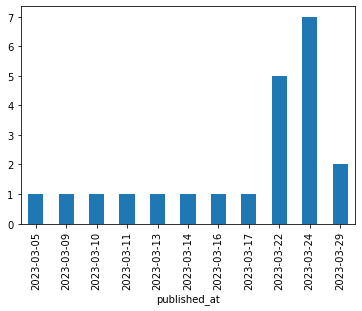

In [352]:
vac_daily_pub_test.plot(kind='bar')
plt.show()

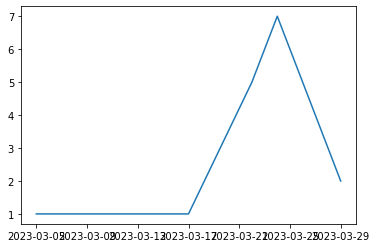

In [368]:
plt.plot(vac_daily_pub_test)
plt.show()

In [342]:
#Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [343]:
vac_desccription_test['day_of_week'] = vac_desccription_test['published_at'].dt.weekday

C:\Users\anvne\AppData\Local\Temp\ipykernel_23792\2857570376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac_desccription_test['day_of_week'] = vac_desccription_test['published_at'].dt.weekday


In [344]:
vac_desccription_test.head(3)

,id,published_at,name,description,key_skills,day_of_week
0,78405583,2023-03-22 13:26:03+03:00,QA engineer Junior (нагрузочное тестирование),<p><strong>Команда нагрузочного тестирования р...,[{'name': 'Нагрузочное тестирование'}],2
1,78398724,2023-03-22 11:53:24+03:00,Тестировщик (QA – engineer),<p><strong>Наш проект</strong> - возможность п...,[],2
2,77873277,2023-03-10 11:13:27+03:00,Стажер,<p>Мы приглашаем исследователей в области маши...,[],4


In [372]:
vac_week_day_pub_test = vac_desccription_test.groupby (vac_desccription_test.published_at.dt.day_of_week)['id'].count()

In [373]:
vac_week_day_pub_test

published_at
0    1
1    1
2    7
3    2
4    9
5    1
6    1
Name: id, dtype: int64

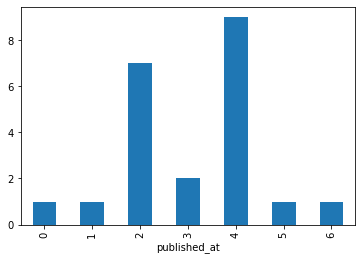

In [374]:
vac_week_day_pub_test.plot(kind='bar')
plt.show()

In [ ]:
#Найдите вакансии с использованием python, которые вам интересны

In [380]:
mask_name = vac_desccription_test['name'].str.contains("консультант")
vac_desccription_test.loc[mask_name]

,id,published_at,name,description,key_skills,day_of_week
4,75175324,2023-03-14 11:22:39+03:00,Финансовый консультант,<p> </p> <p><strong>Финансовый консультант </s...,"[{'name': 'Деловое общение'}, {'name': 'Активн...",1
14,75604902,2023-03-11 11:30:28+03:00,Финансовый консультант,<p>Сбер — лучший работодатель России. У нас 14...,[],5


In [ ]:
#Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий


In [412]:
vacancy_df_test_skills = vacancy_df_test['key_skills'].apply(lambda list_with_dicts: ', '.join([x.get('name') for x in list_with_dicts]))

In [413]:
vacancy_df_test_skills.value_counts()

                                                                                                 13
Нагрузочное тестирование                                                                          1
SQL, BPMN, Atlassian Confluence, Atlassian Jira                                                   1
Деловое общение, Активные продажи                                                                 1
Активные продажи, B2C продажи                                                                     1
Java, SQL, Нагрузочное тестирование                                                               1
Python, SQL, MS PowerPoint                                                                        1
B2C продажи                                                                                       1
Деловое общение, Деловая переписка, Грамотность, Грамотная речь, Работа в команде                 1
Грамотная речь, исходящие звонки, Ведение переговоров, Деловое общение, Телефонные переговоры     1


In [ ]:
#Постройте график наиболее востребованных навыков

# Решение на большой выгрузке

In [ ]:
vac_dict = []
for vac_id in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vac_dict.append(res.json())

In [ ]:
#vac_dict

In [ ]:
#vacancy_df = pd.json_normalize(vac_dict) 

In [ ]:
#vacancy_df['key_skills'].dropna()

In [ ]:
#vacancy_df['key_skills'].apply(lambda list_with_dicts:','.join([x.get('name') for x in list_with_dicts]))

In [ ]:
#vacancy_df

In [265]:
#vacancy_df['key_skills'].apply(lambda list_with_dict:','.join([x.get('name') for x in list_with_dict]))